checking min max utc time of files

In [ ]:
import json
from datetime import datetime

def process_jsonl_file(file_path):
    """
    Load a JSONL file, extract the min and max of the 'created_utc' field,
    and convert them to human-readable format.

    Args:
        file_path (str): Path to the JSONL file.

    Returns:
        dict: A dictionary containing the min and max 'created_utc' values
              in both UNIX and human-readable formats.
    """
    created_utc_values = []

    # Load the JSONL file
    with open(file_path, 'r') as file:
        for line in file:
            try:
                data = json.loads(line)
                if 'created_utc' in data:
                    created_utc_values.append(data['created_utc'])
            except json.JSONDecodeError as e:
                print(f"Skipping invalid JSON line in {file_path}: {e}")

    if not created_utc_values:
        raise ValueError("No 'created_utc' values found in the file.")

    # Calculate min and max
    min_utc = min(created_utc_values)
    max_utc = max(created_utc_values)

    # Convert to human-readable format
    min_human_readable = datetime.utcfromtimestamp(min_utc).strftime('%Y-%m-%d %H:%M:%S')
    max_human_readable = datetime.utcfromtimestamp(max_utc).strftime('%Y-%m-%d %H:%M:%S')

    return {
        "min_utc": min_utc,
        "max_utc": max_utc,
        "min_human_readable": min_human_readable,
        "max_human_readable": max_human_readable
    }

# Example usage
file_list =[
    # "fednews_comments_2025-01-01_to_2025-05-01_filtered.jsonl",
    # "fednews_posts_2025-01-01_to_2025-05-01_filtered.jsonl",
    # "jobs_comments_2022-01-01_to_2025-05-01_filtered.jsonl",
    # "jobs_posts_2022-01-01_to_2025-05-01_filtered.jsonl",
    # "layoffs_comments_2022-01-01_to_2025-05-01_filtered.jsonl",
    # "layoffs_posts_2022-01-01_to_2025-05-01_filtered.jsonl",
    "r_Layoffs_comments.jsonl",
    "r_Layoffs_posts.jsonl",
]

for file_path in file_list:
    print(f"Processing file: {file_path}")
    # Process each file and print the results
    result = process_jsonl_file(file_path)
    print("Minimum created_utc:", result["min_utc"])
    print("Minimum (human-readable):", result["min_human_readable"])
    print("Maximum created_utc:", result["max_utc"])
    print("Maximum (human-readable):", result["max_human_readable"])



In [6]:
posts_files = [
'teamblind_layoffs_posts_and_comments.jsonl',
'layoffs_posts.jsonl',
'fednews_posts.jsonl',
'jobs_posts.jsonl']

comments_files = [
'layoffs_comments.jsonl',
'jobs_comments.jsonl',
'fednews_comments.jsonl',
]

# Drawing 100 posts in random from each files

In [7]:
import random
import json
posts_files = [
    'teamblind_layoffs_posts_and_comments.jsonl',
    'layoffs_posts.jsonl',
    'fednews_posts.jsonl',
    'jobs_posts.jsonl'
]

for input_file in posts_files:
    output_file = f'sampled_100_{input_file}'
    with open(input_file, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    
    # Randomly select 100 lines
    if len(lines) >= 100:
        sampled_lines = random.sample(lines, 100)
    else:
        print(f"Warning: {input_file} has only {len(lines)} lines. Using all lines.")
        sampled_lines = lines
    
    # Write sampled lines to new file
    with open(output_file, 'w', encoding='utf-8') as f:
        f.writelines(sampled_lines)
    
    print(f"Created {output_file} with {len(sampled_lines)} lines")

print("\nSampling complete! New files created:")
for input_file in posts_files:
    print(f"  - sampled_100_{input_file}")

# adding date key from created_utc key

In [ ]:
import json
from datetime import datetime

posts_files = [
'layoffs_posts.jsonl',
'fednews_posts.jsonl',
'jobs_posts.jsonl']

comments_files = [
'layoffs_comments.jsonl',
'jobs_comments.jsonl',
'fednews_comments.jsonl',
]


for input_file in posts_files + comments_files:
    print(f"Processing file: {input_file}")
    
    # Read the JSONL file and convert 'created_utc' to 'date'
    output_path = f'processed_{input_file}.jsonl'
    with open(input_file, 'r') as infile, open(output_path, 'w') as outfile:
        for line in infile:
            obj = json.loads(line)
            if 'created_utc' in obj:
                obj['date'] = datetime.utcfromtimestamp(obj['created_utc']).strftime('%Y-%m-%d')
            else:
                print(f"Warning: 'created_utc' not found in line: {line.strip()}")
                obj['date'] = None
            outfile.write(json.dumps(obj) + '\n')


Processing file: flairwise_reddit/layoffs_flairwise_posts.jsonl


/tmp/ipykernel_673041/805124220.py:29: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  obj['date'] = datetime.utcfromtimestamp(obj['created_utc']).strftime('%Y-%m-%d')


# plotting Trend of posts in 3 subreddits and one teamblind channel

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from collections import Counter

posts_files = [
    'teamblind_layoffs_posts_and_comments.jsonl',
    'layoffs_posts.jsonl',
    'fednews_posts.jsonl',
    'jobs_posts.jsonl'
]
labels = {
    'teamblind_layoffs_posts_and_comments.jsonl': 'teamBlind/Layoffs',
    'layoffs_posts.jsonl': 'r/Layoffs',
    'fednews_posts.jsonl': 'r/fednews',
    'jobs_posts.jsonl': 'r/jobs'
}

monthly_counts = {}

for file in posts_files:
    counter = Counter()
    with open(file, 'r') as f:
        print(f"Processing file: {file}")
        for line in f:
            obj = json.loads(line)
            if 'date' in obj:
                try:
                    month = datetime.strptime(obj['date'], '%Y-%m-%d').strftime('%Y-%m')
                    counter[month] += 1
                except:
                    continue
    monthly_counts[file] = counter

# Create dataframe
all_months = sorted({month for c in monthly_counts.values() for month in c})
df = pd.DataFrame(index=all_months)

for file, count in monthly_counts.items():
    label = labels.get(file)  # Use the label mapping if available
    # if label not in df.columns:
    #     df[label] = 0
    # # Fill the DataFrame with counts
    df[label] = pd.Series(count)

df = df.fillna(0).astype(int)

# Plot
plt.figure(figsize=(12, 6))
for col in df.columns:
    plt.plot(df.index, df[col], label=col)

plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.title('Monthly Post Volume Trend per Channel')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
# Save the DataFrame to a CSV file
df.to_csv('monthly_post_counts2.csv', index_label='Month')

will try to fix the skewness, and plot each one separately

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Reload the file after reset
file_path = "monthly_post_counts.csv"
df = pd.read_csv(file_path, index_col=0)
df.index = pd.to_datetime(df.index)

# Output directory
output_dir = "monthly_post_plots"
os.makedirs(output_dir, exist_ok=True)

# Individual trend and histogram plots (saved)
for col in df.columns:
    # Trend plot
    plt.figure(figsize=(10, 4))
    plt.plot(df.index, df[col], marker='o')
    plt.title(f"Monthly Trend - {col}")
    plt.xlabel("Month")
    plt.ylabel("Number of Posts")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"{output_dir}/{col}_trend.png")
    plt.close()

    # Histogram
    plt.figure(figsize=(10, 4))
    plt.bar(df.index.strftime('%Y-%m'), df[col])
    plt.title(f"Monthly Histogram - {col}")
    plt.xlabel("Month")
    plt.ylabel("Number of Posts")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig(f"{output_dir}/{col}_histogram.png")
    plt.close()

# Combined trend plot
plt.figure(figsize=(12, 6))
for col in df.columns:
    plt.plot(df.index, df[col], label=col)
plt.xlabel("Month")
plt.ylabel("Number of Posts")
plt.title("Monthly Post Volume Trend per Channel")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig(f"{output_dir}/combined_trend.png")
plt.close()

# Log-scaled version
plt.figure(figsize=(12, 6))
for col in df.columns:
    plt.plot(df.index, df[col], label=col)
plt.yscale('log')
plt.xlabel("Month")
plt.ylabel("Log(Number of Posts)")
plt.title("Monthly Post Volume (Log Scale)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig(f"{output_dir}/log_scaled_trend.png")
plt.close()

# Faceted subplot layout
fig, axes = plt.subplots(nrows=len(df.columns), figsize=(12, 10), sharex=True)
for ax, col in zip(axes, df.columns):
    ax.plot(df.index, df[col], marker='o')
    ax.set_title(col)
    ax.set_ylabel("Posts")
plt.xlabel("Month")
plt.tight_layout()
plt.savefig(f"{output_dir}/faceted_subplots.png")
plt.close()

output_dir


# Flairwise files EDA

In [5]:
import json

def get_unique_link_flair_text(file_path):
    """
    Extract unique values of the 'link_flair_text' key from a JSONL file.

    Args:
        file_path (str): Path to the JSONL file.

    Returns:
        set: A set of unique values for the 'link_flair_text' key.
    """
    unique_flair_texts = set()

    # Load the JSONL file
    with open(file_path, 'r') as file:
        for line in file:
            data = json.loads(line)
            if 'link_flair_text' in data:
                unique_flair_texts.add(data['link_flair_text'])

    return unique_flair_texts

# Example usage
flairwise_posts_files = [
    'flairwise_reddit/layoffs_flairwise_posts.jsonl',
    'flairwise_reddit/jobs_flairwise_posts.jsonl',
]

for file in flairwise_posts_files:
    print(f"Processing file: {file}")
    unique_flairs = get_unique_link_flair_text(file)
    print(f"Unique link_flair_text values in {file}:")
    for flair in unique_flairs:
        print(flair)

Processing file: flairwise_reddit/layoffs_flairwise_posts.jsonl
Unique link_flair_text values in flairwise_reddit/layoffs_flairwise_posts.jsonl:
about to be laid off
job hunting
previously laid off
recently laid off
Processing file: flairwise_reddit/jobs_flairwise_posts.jsonl
Unique link_flair_text values in flairwise_reddit/jobs_flairwise_posts.jsonl:
Layoffs
Rejections
Unemployment
Job searching
Leaving a job


Processing file: flairwise_reddit/layoffs_flairwise_posts.jsonl
Subreddit name: layoffs
Monthly trend saved to flairwise_reddit/layoffs_flairwise_posts_monthly_trend.csv
Plot saved to flairwise_reddit/layoffs_flairwise_posts_monthly_trend.png


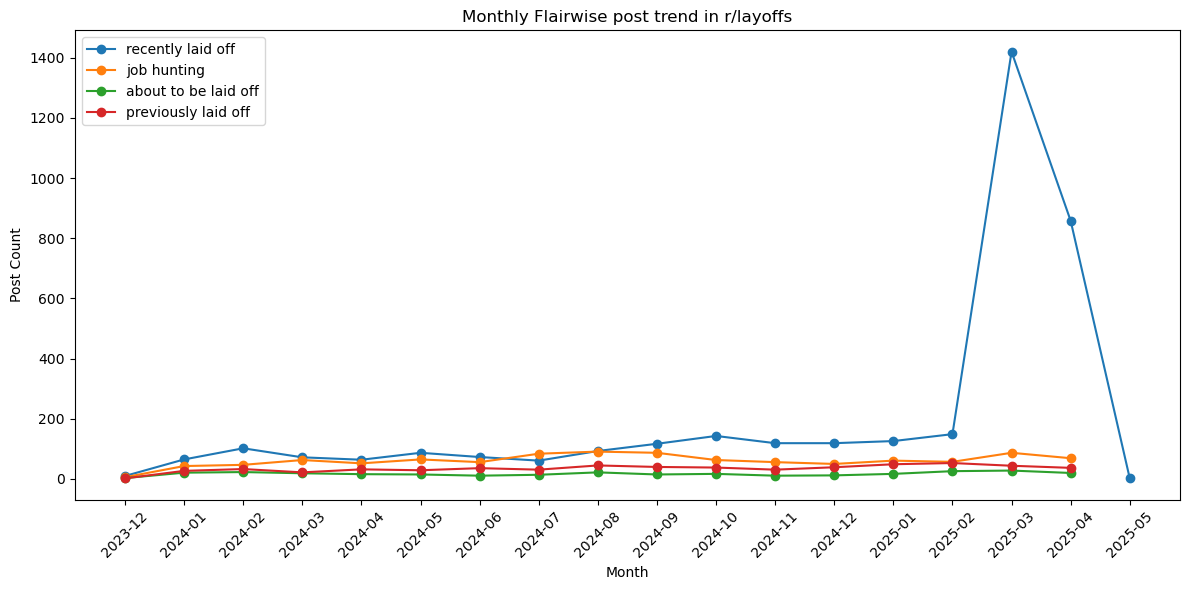

Processing file: flairwise_reddit/jobs_flairwise_posts.jsonl
Subreddit name: jobs
Monthly trend saved to flairwise_reddit/jobs_flairwise_posts_monthly_trend.csv
Plot saved to flairwise_reddit/jobs_flairwise_posts_monthly_trend.png


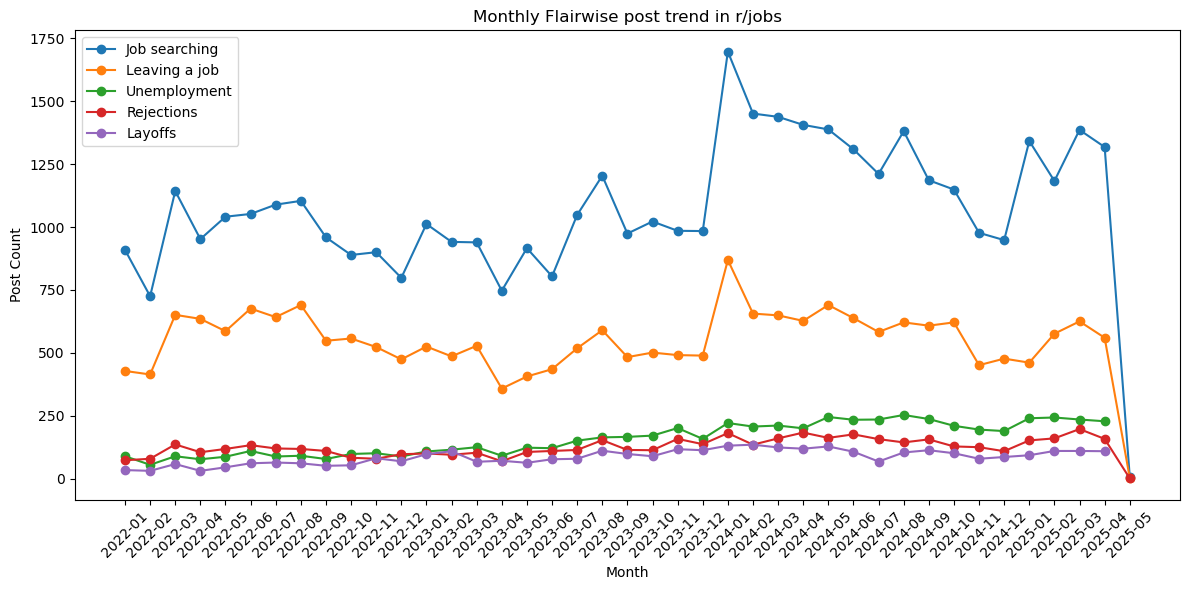

In [9]:
import json
import pandas as pd
from collections import defaultdict
from datetime import datetime
import matplotlib.pyplot as plt

def get_monthly_trend(file_path):
    """
    Calculate the monthly trend for each flair in a JSONL file.

    Args:
        file_path (str): Path to the JSONL file.

    Returns:
        dict: A dictionary where keys are flairs and values are dictionaries
              with months as keys and counts as values.
    """
    monthly_trend = defaultdict(lambda: defaultdict(int))

    # Load the JSONL file
    with open(file_path, 'r') as file:
        for line in file:
            data = json.loads(line)
            if 'link_flair_text' in data and 'date' in data:
                flair = data['link_flair_text']
                # Extract the month (YYYY-MM format) from the date
                try:
                    post_date = datetime.strptime(data['date'], "%Y-%m-%d")
                    month = post_date.strftime("%Y-%m")
                    monthly_trend[flair][month] += 1
                except ValueError:
                    print(f"Invalid date format in post: {data['date']}")

    return monthly_trend

def save_trend_to_csv_and_plot(trend, output_csv, output_plot,subreddit_name):
    """
    Save the monthly trend to a CSV file and plot the trends.

    Args:
        trend (dict): The monthly trend dictionary.
        output_csv (str): Path to save the CSV file.
        output_plot (str): Path to save the plot.
    """
    # Convert the trend dictionary to a DataFrame
    trend_data = []
    for flair, months in trend.items():
        for month, count in months.items():
            trend_data.append({"Flair": flair, "Month": month, "Count": count})
    df = pd.DataFrame(trend_data)

    # Save to CSV
    df.to_csv(output_csv, index=False)
    print(f"Monthly trend saved to {output_csv}")

    # Plot the trends
    plt.figure(figsize=(12, 6))
    for flair in df["Flair"].unique():
        flair_data = df[df["Flair"] == flair]
        plt.plot(flair_data["Month"], flair_data["Count"], marker='o', label=flair)

    plt.xlabel("Month")
    plt.ylabel("Post Count")
    plt.title(f"Monthly Flairwise post trend in r/{subreddit_name}")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()

    # Save the plot
    plt.savefig(output_plot)
    print(f"Plot saved to {output_plot}")
    plt.show()

# Example usage
flairwise_posts_files = [
    'flairwise_reddit/layoffs_flairwise_posts.jsonl',
    'flairwise_reddit/jobs_flairwise_posts.jsonl',
]

for file in flairwise_posts_files:
    print(f"Processing file: {file}")
    # get the subreddit name from the file name
    subreddit_name = file.split('/')[-1].replace('_flairwise_posts.jsonl', '')
    print(f"Subreddit name: {subreddit_name}")

    monthly_trend = get_monthly_trend(file)

    # Save to CSV and plot
    output_csv = file.replace(".jsonl", "_monthly_trend.csv")
    output_plot = file.replace(".jsonl", "_monthly_trend.png")
    save_trend_to_csv_and_plot(monthly_trend, output_csv, output_plot,subreddit_name)